In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data
train = pd.read_csv('credit_train.csv')
test = pd.read_csv('credit_test.csv')

In [3]:
# overview of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
# overview of the data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [5]:
# overview of the data
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
# inspect target variable
train['Loan Status'].value_counts(dropna=False)

Fully Paid     77361
Charged Off    22639
NaN              514
Name: Loan Status, dtype: int64

In [7]:
# check for missing values
train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

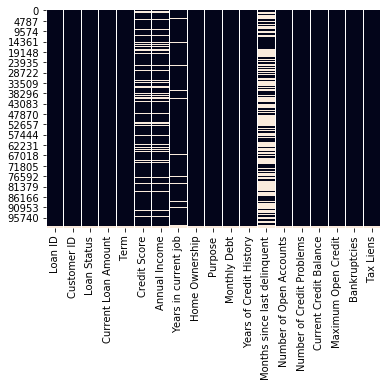

In [8]:
# visualize missing values 
sns.heatmap(train.isnull(),cbar=False)

In [9]:
# drop empty observations
train.dropna(how='all', inplace=True)

In [10]:
# inspect what was droped
train.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [11]:
# went through all value counts
train['Term'].value_counts(dropna=False)

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [12]:
# convert target to binary
train['Loan Status'] = np.where(train['Loan Status']=='Fully Paid', 0, 1)

In [13]:
# convert to binary
train['Term'] = np.where(train['Term']=='Fully Paid', 0, 1)

In [14]:
# filling nan values
train['Months since last delinquent'] = np.where((train['Months since last delinquent'].isna() == True),0,train['Months since last delinquent'])
# train['Annual Income'] = np.where((train['Annual Income'].isna() == True),0,train['Annual Income'])
# train['Credit Score'] = np.where((train['Credit Score'].isna() == True),0,train['Credit Score'])

In [15]:
# subclass of people  had an abnormally high credit score (>850) and 100% default rate
# we decided to divide these values by 10 since this issue was skewing our data

# dividing credit score values by 10 if they are > 850 
train['Credit Score'] = np.where(train['Credit Score']>850, train['Credit Score']/10, train['Credit Score'])

In [16]:
# convert values to numbers for modeling

input_ = {'Home Mortgage':1,
'Rent':2,
'Own Home':3,
'HaveMortgage':4}
train['Home Ownership'] = train['Home Ownership'].map(input_)

In [17]:
# convert values to numbers for modeling

input_ = {'Debt Consolidation':1,'other':4,'Home Improvements':3,'Other':4,
'Business Loan':5,
'Buy a Car':6,
'Medical Bills':7,
'Buy House':8,
'Take a Trip':9,
'major_purchase':10,
'small_business':11,
'moving':12,
'wedding':13,
'vacation':14,
'Educational Expenses':15,
'renewable_energy':16}
train['Purpose'] = train['Purpose'].map(input_)

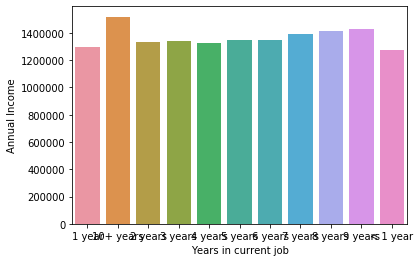

In [18]:
# how does Annual income look before inputing years in current job

x = train.groupby(['Years in current job'])['Annual Income'].mean()
sns.barplot(x.index, x)

In [19]:
# input missing values for years in current job based on years of credit history

train['ych_range'] = pd.qcut(train['Years of Credit History'],5, labels=['one','two','three','four','five'])

train['Years in current job'] = np.where(train['Years in current job'].isna()==True, train['ych_range'], train['Years in current job'])

input_ = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1, '4 years':4,
          '6 years':6, '7 years':7, '8 years':8, '9 years':9, 'one':4, 'two':5, 'three':6, 'four':6, 'five':7}

train['Years in current job'] = train['Years in current job'].map(input_)

In [20]:
# verify the change

train['Years in current job'].value_counts(dropna=False)

10    31121
2      9134
3      8169
0      8164
5      7379
7      7232
6      7171
4      6633
1      6460
8      4582
9      3955
Name: Years in current job, dtype: int64

In [21]:
# drop all remaining missing values

df = train.dropna()

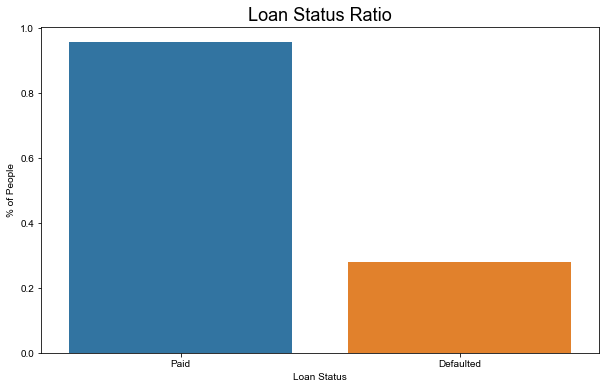

In [22]:
plt.figure(figsize = (10,6))
y = [(77207/len(df)),(22587/len(df))]
x_labels = ['Paid','Defaulted']
sns.barplot(x_labels,y)
sns.set(style='dark')
plt.xlabel('Loan Status');
plt.ylabel('% of People')
plt.title('Loan Status Ratio', fontsize=18);

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


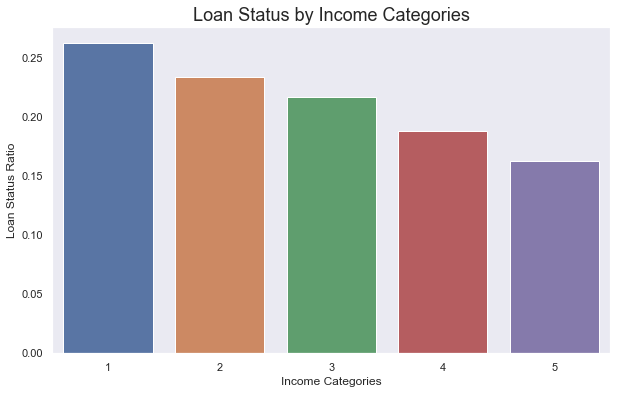

In [43]:
df['Income_Category'] = pd.qcut(df['Annual Income'],5, labels=[1,2,3,4,5])

df.groupby(['Income_Category'])['Loan Status'].mean()

y = df.groupby(['Income_Category'])['Loan Status'].mean()
plt.figure(figsize = (10,6))
sns.barplot(y.index,y)
sns.set(style='dark')
plt.xlabel('Income Categories');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Income Categories', fontsize=18);

In [24]:
# H0: there is no significant difference in loan status between income categories 
# H1: there is a significant difference in loan status between income categories 

In [25]:
income1 = df[df['Income_Category']=='One']
income2 = df[df['Income_Category']=='Two']
income3 = df[df['Income_Category']=='Three']
income4 = df[df['Income_Category']=='Four'] 
income5 = df[df['Income_Category']=='Five']

df_freq2=pd.DataFrame(columns=['one', 'two', 'three', 'four','five'])
df_freq2['one']= income1.groupby('Loan Status')['Loan Status'].count()
df_freq2['two']= income2.groupby('Loan Status')['Loan Status'].count()
df_freq2['three']= income3.groupby('Loan Status')['Loan Status'].count()
df_freq2['four']= income4.groupby('Loan Status')['Loan Status'].count()
df_freq2['five']= income5.groupby('Loan Status')['Loan Status'].count()

In [26]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq2
print(table)
stat, p, dof, expected = chi2_contingency(df_freq2)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

               one    two  three   four   five
Loan Status                                   
0            11894  12364  12637  13103  13514
1             4247   3772   3496   3033   2623
dof=4
[[12705.8635896  12701.92769233 12699.56615396 12701.92769233
  12702.71487178]
 [ 3435.1364104   3434.07230767  3433.43384604  3434.07230767
   3434.28512822]]
probability=0.950, critical=9.488, stat=590.416)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


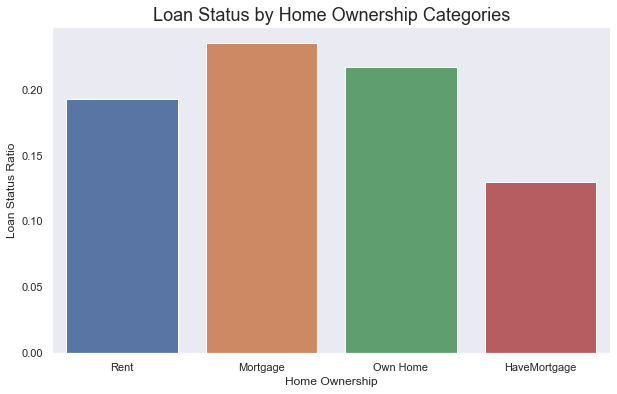

In [27]:
plt.figure(figsize = (10,6))
y = df.groupby(['Home Ownership'])['Loan Status'].mean()
labels = ['Rent','Mortgage','Own Home','HaveMortgage']
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('Home Ownership');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Home Ownership Categories', fontsize=18);

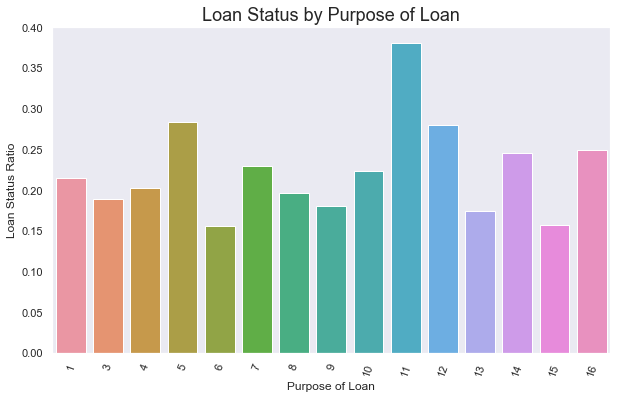

In [28]:
y = df.groupby(['Purpose'])['Loan Status'].mean()
plt.figure(figsize = (10,6))
sns.barplot(y.index,y)
sns.set(style='dark')
plt.xlabel('Purpose of Loan')
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Purpose of Loan', fontsize=18);

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


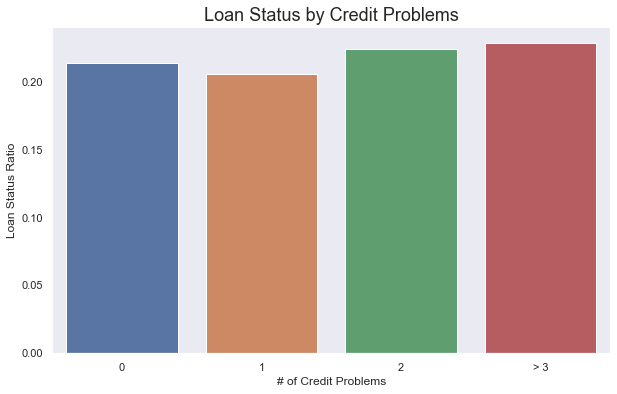

In [29]:
df['Number of Credit Problems'] = np.where(df['Number of Credit Problems']>=3.0,3.0,df['Number of Credit Problems'])

df.groupby(['Number of Credit Problems'])['Loan Status'].mean()

y = df.groupby(['Number of Credit Problems'])['Loan Status'].mean()
labels = ['0','1','2','> 3']
plt.figure(figsize = (10,6))
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('# of Credit Problems');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Credit Problems', fontsize=18);

In [30]:
# H0: there is no significant difference in loan status between credit problem categories
# H1: there is a significant different in loan status between credit problem categories

In [31]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].astype(int)

credit0 = df[df['Number of Credit Problems']==0]
credit1 = df[df['Number of Credit Problems']==1]
credit2 = df[df['Number of Credit Problems']==2]
credit3 = df[df['Number of Credit Problems']==3] 

df_freq3=pd.DataFrame(columns=['zero', 'one', 'two', 'three'])
df_freq3['zero']= credit0.groupby('Loan Status')['Loan Status'].count()
df_freq3['one']= credit1.groupby('Loan Status')['Loan Status'].count()
df_freq3['two']= credit2.groupby('Loan Status')['Loan Status'].count()
df_freq3['three']= credit3.groupby('Loan Status')['Loan Status'].count()

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq3
print(table)
stat, p, dof, expected = chi2_contingency(df_freq3)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

              zero   one  two  three
Loan Status                         
0            54508  7808  822    374
1            14800  2022  238    111
dof=3
[[54557.83369483  7737.97404658   834.41022272   381.78203587]
 [14750.16630517  2092.02595342   225.58977728   103.21796413]]
probability=0.950, critical=7.815, stat=4.804)
Independent (fail to reject H0)
signigicance=0.050, p=0.187,
Independent (fail to reject)


In [33]:
y = df[df['Annual Income'] <= 150000000]
x = y[(y[['Credit Score']]!= 0).all(axis=1)]

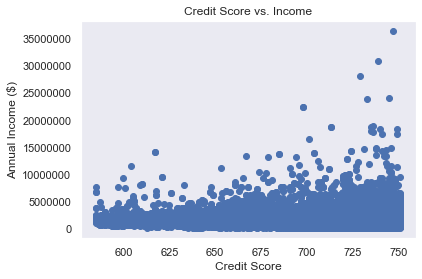

In [34]:
import matplotlib.pyplot as plt
import numpy as np
# Some example data to display
fig, ax = plt.subplots()
ax.scatter(x['Credit Score'], x['Annual Income'])
ax.set_title('Credit Score vs. Income')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Annual Income ($)')
# set tick style
ax.ticklabel_format(axis='y', style='plain')

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


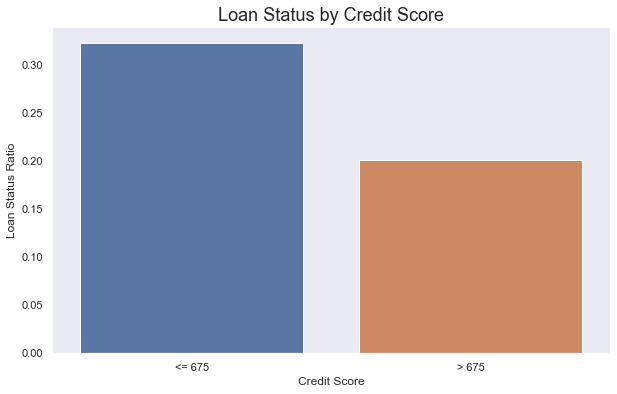

In [35]:
df['Credit Score'] = df['Credit Score'].astype(int)

df['Credit_Category'] = np.where(df['Credit Score']<=675,1,2)

y = df.groupby(['Credit_Category'])['Loan Status'].mean()
labels = ['<= 675','> 675']
plt.figure(figsize = (10,6))
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('Credit Score');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Credit Score', fontsize=18);

In [36]:
# H0: there is no significant difference in loan status between low and high credit score categories 
# H1: there is a significant difference in loan status between low and high credit score categories 

In [37]:
credit1 = df[df['Credit Score']<=675]
credit2 = df[df['Credit Score']>675]

df_freq4=pd.DataFrame(columns=['one', 'two'])
df_freq4['one']= credit1.groupby('Loan Status')['Loan Status'].count()
df_freq4['two']= credit2.groupby('Loan Status')['Loan Status'].count()

In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq4
print(table)
stat, p, dof, expected = chi2_contingency(df_freq4)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

              one    two
Loan Status             
0            5078  58434
1            2428  14743
dof=1
[[ 5908.56899223 57603.43100777]
 [ 1597.43100777 15573.56899223]]
probability=0.950, critical=3.841, stat=604.143)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [39]:
# new shape
df.shape

(80683, 22)

In [44]:
# preprocess for modeling

X = df.drop(['Loan ID', 'Customer ID', 'Loan Status', 'ych_range'], axis=1)
y = df['Loan Status']

cat = ['Years in current job', 'Home Ownership', 'Purpose', 'Income_Category']
con = [x for x in X.columns if x not in cat] 

In [45]:
# import modeling packages

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, BaseDecisionTree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, plot_confusion_matrix

In [46]:
# split, scale and one hot encode data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size=0.25)

ct = ColumnTransformer([('One_Hot_Encoder', OneHotEncoder(), cat),('scaler', StandardScaler(), con)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [48]:
# run gridsearch on logreg model, print results

lg = LogisticRegression(class_weight='balanced', random_state=2, n_jobs=-2, max_iter=1000)

params = {'penalty':['l1', 'l2'],
         'C':[.01, .1, .25, .5],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gv_lg = GridSearchCV(lg, params, n_jobs=-2, cv=5, verbose =10)

gv_lg.fit(X_train, y_train)
y_train_pred = gv_lg.predict(X_train)
y_test_pred = gv_lg.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-2)]: Done  39 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-2)]: Done  63 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-2)]: Done  76 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-2)]: Done  91 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 106 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 123 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done 159 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  

Training Precision:  0.2802775912245355
Testing Precision:  0.2889229198570699



Training Recall:  0.7823166445364368
Testing Recall:  0.7774725274725275



Training Accuracy:  0.528903358011634
Testing Accuracy:  0.5374547617867235



Training F1-Score:  0.4126990667298461
Testing F1-Score:  0.4212876814291031


In [49]:
# best paramaters for the logreg gridsearch

gv_lg.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}

In [50]:
# run best param model to gain insight into this model

lg_best = LogisticRegression(C=.5, penalty='l2', solver='saga', class_weight='balanced', random_state=2, n_jobs=-2, max_iter=1000, verbose=10)
lg_best.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.


convergence after 839 epochs took 34 seconds


[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   33.8s finished


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, n_jobs=-2,
                   random_state=2, solver='saga', verbose=10)

In [51]:
# best logreg coefficients

lg_best.coef_

array([[-4.38230431e-02, -8.10662596e-02, -8.21282049e-02,
        -1.15356367e-01, -1.29776887e-01, -2.08605230e-02,
         3.11227730e-02,  4.39880614e-02, -4.74178491e-02,
         1.70858843e-03, -6.76811423e-02, -1.25332463e-01,
         4.98106684e-02, -6.67701932e-02, -3.68998865e-01,
        -6.27637287e-02, -4.39393576e-02, -2.26449127e-01,
         3.08199577e-01, -3.83489300e-01,  4.70582234e-02,
        -2.86924376e-01, -3.69416528e-01, -6.09501082e-02,
         6.12489691e-01,  1.34378794e-01, -6.64977169e-02,
        -1.45815180e-03, -1.36736656e-01,  2.52079117e-02,
         3.18482003e-01,  9.36316656e-02, -3.37837549e-02,
        -2.98832785e-01, -5.90787981e-01, -2.39976815e+00,
         0.00000000e+00, -1.14807500e-01, -1.33460842e-02,
         1.96120838e-01,  2.34512153e-02, -2.66438567e-02,
         1.79580753e-02,  4.45327503e-02, -2.47507762e-02,
        -1.84383455e-02, -8.00335706e-02,  7.17980833e-03,
        -8.11365765e-02]])

In [52]:
# run bagging classifier on the best logreg, print results

bc_lr = BaggingClassifier(LogisticRegression(C=.01, penalty='l1', solver='saga', class_weight='balanced', random_state=2, n_jobs=-2, max_iter=1000, verbose=10),
                          n_estimators= 30, oob_score= True, n_jobs=-2)

bc_lr.fit(X_train, y_train)
y_train_pred = bc_lr.predict(X_train)
y_test_pred = bc_lr.predict(X_test)




print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Training Precision:  0.2761759837684874
Testing Precision:  0.28433190871703895



Training Recall:  0.8080137467780989
Testing Recall:  0.8072344322344323



Training Accuracy:  0.5113200687466949
Testing Accuracy:  0.5182688017450796



Training F1-Score:  0.41165118083603597
Testing F1-Score:  0.4205378973105134


In [31]:
# new split for the random forest model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size=0.25)


# scale continues variables
scaler = StandardScaler()
X_train[con] = scaler.fit_transform(X_train[con])
X_test[con] = scaler.transform(X_test[con])

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [32]:
# gridsearch random forest classifier, print results

rfc = RandomForestClassifier(random_state =4, class_weight='balanced')

params = {'max_depth':[15,17,19],
         'min_samples_leaf':[50, 75, 100],
         'max_features':[None]}

gs_rfc = GridSearchCV(estimator=rfc, param_grid = params, cv=5, verbose=10, n_jobs=-2)

gs_rfc.fit(X_train, y_train)
y_train_pred = gs_rfc.predict(X_train)
y_test_pred = gs_rfc.predict(X_test)


print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done  29 out of  45 | elapsed:  1.9min remaining:  1.0min
[Parallel(n_jobs=-2)]: Done  34 out of  45 | elapsed:  2.5min remaining:   47.9s
[Parallel(n_jobs=-2)]: Done  39 out of  45 | elapsed:  2.5min remaining:   23.2s
[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed:  2.8min finished


Training Precision:  0.5507087668065949
Testing Precision:  0.4566080544526375



Training Recall:  0.7070217917675545
Testing Recall:  0.5528846153846154



Training Accuracy:  0.8159703860391327
Testing Accuracy:  0.7606960487829062



Training F1-Score:  0.6191518467852257
Testing F1-Score:  0.5001553277415346


In [33]:
# get best params from gridsearch

gs_rfc.best_params_

{'max_depth': 19, 'max_features': None, 'min_samples_leaf': 50}

In [34]:
# run best random forest 

rfc_best = RandomForestClassifier(n_jobs=-1, random_state =2, class_weight='balanced',max_depth=19, max_features=None, min_samples_leaf= 50)
rfc_best.fit(X_train, y_train)

In [36]:
# inspect feature importance

rfc_best.feature_importances_
for name, importance in zip(X_train.columns, rfc_best.feature_importances_):
    print(name, "=", importance)

array([2.40549023e-01, 0.00000000e+00, 4.81836670e-01, 6.95184931e-02,
       1.46643682e-02, 6.23346832e-03, 4.47544534e-03, 4.81738005e-02,
       3.22878064e-02, 1.68655438e-02, 1.45353395e-02, 1.13991206e-03,
       3.45474185e-02, 3.41414003e-02, 1.01222940e-03, 1.90817273e-05])

In [42]:
# run vating classifier on all models, print results

voting_clf = VotingClassifier(estimators = [('rfc_best', rfc_best), ('lg_best', lg_best)],
                             n_jobs=-2)

voting_clf.fit(X_train, y_train)
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))